In [1]:
import requests

def wikipedia_page(title):
  '''
  This function returns the raw text of a wikipedia page
  given a wikipedia page title
  '''

  params = {
    'action': 'query',
    'format': 'json', # request json formatted content
    'titles': title, # title of the wikipedia page
    'prop': 'extracts',
    'explaintext': True
  }

  # send a request to the wikipedia api
  response = requests.get(
    'https://en.wikipedia.org/w/api.php',
    params= params
  ).json()

  # Parse the result
  page = next(iter(response['query']['pages'].values()))


  # return the page content
  if 'extract' in page.keys():
    return page['extract']
  else:
    return "Page not found"
# first get the text from the wikipedia page with

In [2]:
text = wikipedia_page('Earth').lower()
print(text[:200] + '...')

earth is the third planet from the sun and the only astronomical object known to harbor life. this is enabled by earth being a water world, the only one in the solar system sustaining liquid surface w...


In [3]:
from collections import Counter

# we transform the text into a list of words
# by splitting over the space character ' '
word_list = text.split(' ')

# and count the words
word_counts = Counter(word_list)

for w in word_counts.most_common(20):
   print(f"{w[0]}:  \t{w[1]} ")

the:  	706 
of:  	363 
and:  	283 
is:  	172 
to:  	166 
in:  	149 
a:  	138 
earth's:  	115 
by:  	76 
with:  	75 
as:  	72 
from:  	69 
earth:  	68 
at:  	58 
that:  	58 
are:  	49 
surface:  	44 
it:  	43 
about:  	43 
this:  	41 


In [4]:
# transform the text into a list of words
words_list = text.split(' ')

# define the list of words you want to remove from the text
stopwords = ['the', 'has', 'on', 'it', 'of', 'and', 'is','to','in','a','from','by','that', 'with', 'this', 'as', 'an', 'are','its', 'at', 'for']

# use a python list comprehension to remove the stopwords from words_list
words_without_stopwords = [ word for word in words_list if word not in stopwords ]

Counter(words_without_stopwords).most_common(20)

[("earth's", 115),
 ('earth', 68),
 ('surface', 44),
 ('about', 43),
 ('solar', 40),
 ('water', 36),
 ('million', 36),
 ('which', 35),
 ('have', 35),
 ('into', 32),
 ('or', 31),
 ('crust', 28),
 ('most', 27),
 ('life', 27),
 ('land', 26),
 ('sun', 25),
 ('other', 25),
 ('been', 25),
 ('than', 24),
 ('be', 24)]

In [5]:
from wordcloud import WordCloud


# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
  random_state = 8,
  normalize_plurals = False,
  width = 600,
  height= 300,
  max_words = 300,
  stopwords = []
)

# Apply the wordcloud to the text.
wordcloud.generate(text)

(-0.5, 599.5, 299.5, -0.5)

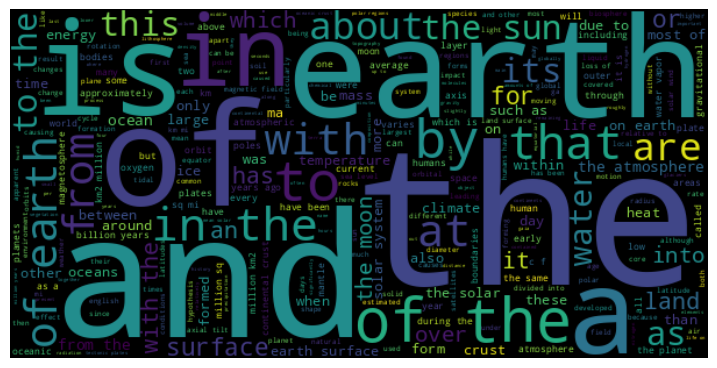

In [6]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [7]:
# import re

# class Matcher:
#     def __init__(self, pattern):
#         self.pattern = re.compile(pattern)

#     def match(self, string):
#         return self.pattern.match(string)

#     def search(self, string):
#         return self.pattern.search(string)

#     def findall(self, string):
#         return self.pattern.findall(string)

# # Example usage:

# matcher = Matcher(r'\d+')

# # Match a single digit
# match = matcher.match('12345')
# if match:
#     print(match.group())  # Prints '1'

# # Search for a digit anywhere in the string
# match = matcher.search('abc123')
# if match:
#     print(match.group())  # Prints '123'

# # Find all digits in the string
# matches = matcher.findall('abc123def456')
# for match in matches:
    # print(match)  # Prints '123', '456'

In [8]:
from wordcloud import WordCloud

# Instantiate / create a new wordcloud.
wordcloud = WordCloud(
  random_state = 8,
  normalize_plurals = False,
  width = 600,
  height= 300,
  max_words = 300,
  stopwords = ["was", "which", "other", "or", "can", "also", "about", "than", "be", "these"]
)

wordcloud.generate(" ".join(words_without_stopwords))

(-0.5, 599.5, 299.5, -0.5)

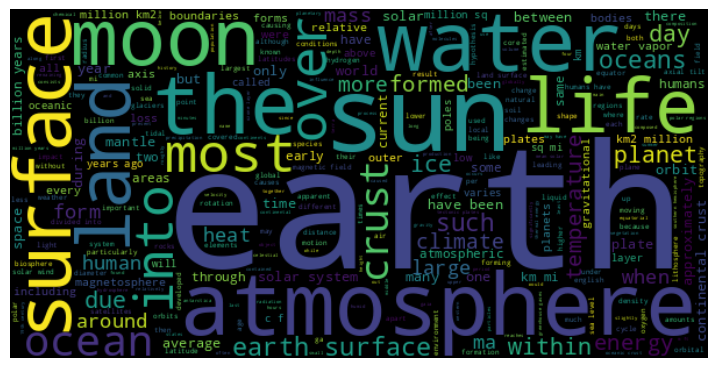

In [9]:
# Import matplotlib
import matplotlib.pyplot as plt

# create a figure
fig, ax = plt.subplots(1,1, figsize = (9,6))


# add interpolation = bilinear to smooth things out
plt.imshow(wordcloud, interpolation='bilinear')

# and remove the axis
plt.axis("off")

In [10]:
# Import the tokenizer
from nltk.tokenize import WordPunctTokenizer

# Tokenize the sentence
tokens = WordPunctTokenizer().tokenize("Let's eat your soup, Grandpa.")
print(tokens)

['Let', "'", 's', 'eat', 'your', 'soup', ',', 'Grandpa', '.']


In [11]:
# Get the text from the Earth wikipedia page
text = wikipedia_page('Earth')

# tokenize
tokens = WordPunctTokenizer().tokenize(text)

# print the 20 most commons tokens
print(Counter(tokens).most_common(20))

[('the', 646), (',', 589), ('.', 492), ('of', 361), ('and', 288), ('Earth', 258), ('is', 174), ('to', 166), ('s', 160), ("'", 159), ('in', 142), ('a', 138), ('(', 110), ('The', 97), ('-', 79), ('with', 74), ('by', 72), ('from', 67), ('as', 67), ('surface', 61)]


In [12]:
from nltk import ngrams

text = "How much wood would a woodchuck chuck if a woodchuck could chuck wood?"

# Tokenize
tokens = WordPunctTokenizer().tokenize(text)

# Only keep the bigrams
bigrams = [w for w in ngrams(tokens,n=2)]

print(bigrams)

[('How', 'much'), ('much', 'wood'), ('wood', 'would'), ('would', 'a'), ('a', 'woodchuck'), ('woodchuck', 'chuck'), ('chuck', 'if'), ('if', 'a'), ('a', 'woodchuck'), ('woodchuck', 'could'), ('could', 'chuck'), ('chuck', 'wood'), ('wood', '?')]


In [13]:
# trigrams
trigrams = ['_'.join(w) for w in  ngrams(tokens,n=3)]
print(trigrams)

['How_much_wood', 'much_wood_would', 'wood_would_a', 'would_a_woodchuck', 'a_woodchuck_chuck', 'woodchuck_chuck_if', 'chuck_if_a', 'if_a_woodchuck', 'a_woodchuck_could', 'woodchuck_could_chuck', 'could_chuck_wood', 'chuck_wood_?']


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
# Import tokenizer, stemmer and stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import string

# Get the text from the Wikipedia Earth page
text = wikipedia_page('Earth').lower()

# Tokenize as usual
tokens  = WordPunctTokenizer().tokenize(text)

# Filter out stopwords
tokens = [tk for tk in tokens if tk not in stopwords.words('english')]

tokens = [tk for tk in tokens if tk not in string.punctuation]

tokens = [tk for tk in tokens if tk not in string.digits]

# Now, instantiate a stemmer
ps = PorterStemmer()

# and stem the tokens
stems   = [ps.stem(tk) for tk in tokens ]

In [16]:
import numpy as np
np.random.choice(stems, size = 10)

array(['support', '".', 'floor', 'reservoir', 'make', 'land', 'climat',
       'planet', 'earth', 'northern'], dtype='<U15')

In [17]:
# !pip install -U pip setuptools wheel
# !pip install -U 'spacy[apple]'
# !python -m spacy download en_core_web_sm

In [18]:
import spacy

# Load the Spacy model
nlp = spacy.load("en_core_web_sm")

# And parse the sentence (taken from which movie?)
doc = nlp("Roads? Where we're going we don't need roads!")

# print the tokens
for token in doc:
   print(token)

Roads
?
Where
we
're
going
we
do
n't
need
roads
!


In [19]:
# parse the text
doc = nlp("All aboard! \t Train NXH123 departs from platform 22 at 3:16 sharp.")

# extract information on each token
for token in doc:
   print(token, token.is_space, token.is_punct, token.is_upper, token.is_digit)

All False False False False
aboard False False False False
! False True False False
	  True False False False
Train False False False False
NXH123 False False True False
departs False False False False
from False False False False
platform False False False False
22 False False False True
at False False False False
3:16 False False False False
sharp False False False False
. False True False False


In [20]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp("I came in and met with her teammates at the meeting.")

# print the lemma of each token
for token in doc:
   print(f"{token.text:>10}\t {token.lemma_} ")

         I	 I 
      came	 come 
        in	 in 
       and	 and 
       met	 meet 
      with	 with 
       her	 her 
 teammates	 teammate 
        at	 at 
       the	 the 
   meeting	 meeting 
         .	 . 


In [21]:
# POS - Part of Speech with Spacy

doc = nlp("If you don't know where you are going any road can take you there.")

# print the nature of each token
for token in doc:
   print(f"{token.text}\t {token.pos_} ")

If	 SCONJ 
you	 PRON 
do	 AUX 
n't	 PART 
know	 VERB 
where	 SCONJ 
you	 PRON 
are	 AUX 
going	 VERB 
any	 DET 
road	 NOUN 
can	 AUX 
take	 VERB 
you	 PRON 
there	 ADV 
.	 PUNCT 


In [22]:
doc = nlp("Grace me no grace, nor uncle me no uncle")
for t in doc: print(t, t.pos_)

Grace VERB
me PRON
no DET
grace NOUN
, PUNCT
nor CCONJ
uncle VERB
me PRON
no DET
uncle NOUN


In [23]:
import nltk
nltk.download('universal_tagset')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

text = nltk.word_tokenize("Grace me no grace, nor uncle me no uncle")
nltk.pos_tag(text,tagset='universal')

[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Unzipping taggers/universal_tagset.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Grace', 'NOUN'),
 ('me', 'PRON'),
 ('no', 'DET'),
 ('grace', 'NOUN'),
 (',', '.'),
 ('nor', 'CONJ'),
 ('uncle', 'ADP'),
 ('me', 'PRON'),
 ('no', 'DET'),
 ('uncle', 'NOUN')]

In [24]:
import requests
from collections import Counter

# text from Alice in Wonderland
r = requests.get('http://www.gutenberg.org/files/11/11-0.txt')

# remove the footer and parse the text
doc = nlp(r.text.split("*** END")[0])

# Find all the 'persons' in the text
persons = []
# For each entity in the doc
for ent in doc.ents:
    # if the entity is a person
    if ent.label_ == 'PERSON':
        # add to the list of persons
        persons.append(ent.text)

# note we could have written the last bit in one line with
persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']

# list the 12 most common ones
Counter(persons).most_common(12)

[('Alice', 341),
 ('Queen', 54),
 ('Hatter', 53),
 ('Mouse', 27),
 ('â\x80\x9cIt', 9),
 ('Bill', 9),
 ('Lory', 7),
 ('Iâ\x80\x99d', 5),
 ('â\x80\x9cif', 5),
 ('Knave', 5),
 ('Gryphon', 5),
 ('William', 4)]

In [25]:
rabbit_ner = [(ent.text, ent.label_) for ent in doc.ents if "Rabbit" in ent.text]
Counter(rabbit_ner).most_common(10)

[(('the White Rabbit', 'ORG'), 5),
 (('Rabbit', 'ORG'), 4),
 (('the White Rabbit', 'FAC'), 3),
 (('Rabbitâ\x80\x99s', 'ORG'), 2),
 (('Rabbitâ\x80\x99s', 'PERSON'), 1),
 (('The Rabbit Sends', 'WORK_OF_ART'), 1),
 (('the White Rabbit', 'WORK_OF_ART'), 1),
 (('the White\r\nRabbit', 'ORG'), 1),
 (('The White Rabbit', 'WORK_OF_ART'), 1)]

**PREPROCESSING TEXT QUIZ**


In [26]:
# download the text
result = requests.get('http://www.gutenberg.org/files/36/36-0.txt')

# This line removes the header and footer
text = result.text[840:].split("*** END")[0]

# This line removes the (weird) non ascii characters
text = text.encode('ascii',errors='ignore').decode('utf-8')

In [27]:
print(text[:230])

 Wells




   But who shall dwell in these worlds if they be inhabited?
    . . . Are we or they Lords of the World? . . . And
    how are all things made for man?
                    KEPLER (quoted in _The Anatomy of Mela


In [28]:
new_text = text.split(" ")
punct = {'.', ',', '?', '\''}
new_text = [word.strip() for word in new_text if word != '' and word not in punct]
print(new_text[:30])
print(len(new_text))

word_counts = Counter(new_text)
print(len(word_counts))
for w in word_counts.most_common(20):
   print(f"{w[0]}:  \t{w[1]}")

['Wells', 'But', 'who', 'shall', 'dwell', 'in', 'these', 'worlds', 'if', 'they', 'be', 'inhabited?', 'Are', 'we', 'or', 'they', 'Lords', 'of', 'the', 'World?', 'And', 'how', 'are', 'all', 'things', 'made', 'for', 'man?', 'KEPLER', '(quoted']
54749
13668
the:  	3710
and:  	2010
of:  	2003
a:  	1349
to:  	1022
I:  	1021
in:  	801
was:  	720
that:  	619
had:  	484
as:  	373
with:  	371
it:  	367
my:  	361
at:  	328
were:  	305
on:  	295
from:  	261
for:  	247
he:  	247


In [29]:
def chartokenizer(word):
    # extracts all the characters in a given word
    return [c for c in word]

result = []
for word in new_text:
  result.extend(chartokenizer(word))

print(len(result))
char_counts = Counter(result)
print(len(char_counts))
count = 0
for c in char_counts:
   if c.isalpha():
    count += 1
print(count)

if '8' in char_counts:
  print(True)
else:
  print(False)

if '[' in char_counts:
  print(True)
else:
  print(False)

if ']' in char_counts:
  print(True)
else:
  print(False)

287292
72
52
True
False
False


In [30]:
tokens = WordPunctTokenizer().tokenize(text)

print(Counter(tokens).most_common(10))

[('the', 4399), (',', 4134), ('.', 3141), ('and', 2358), ('of', 2284), ('a', 1529), ('I', 1264), ('to', 1157), ('in', 920), ('was', 850)]


In [31]:
from nltk.corpus import stopwords

stopwords = stopwords.words("english")

tokens = WordPunctTokenizer().tokenize(text)

tokens = [tk for tk in tokens if tk not in stopwords]

tokens = [tk for tk in tokens if tk not in string.punctuation]

tokens = [tk for tk in tokens if tk not in string.digits]

print(Counter(tokens).most_common(20))

[('I', 1264), ('The', 346), ('upon', 171), ('one', 166), ('said', 166), ('It', 164), ('Martians', 163), ('came', 150), ('He', 145), ('people', 145), ('And', 130), ('towards', 128), ('saw', 127), ('time', 120), ('could', 116), ('man', 114), ('little', 111), ('black', 106), ('us', 101), ('night', 100)]


In [32]:
nlp = spacy.load("en_core_web_sm")

doc = nlp(text)

In [33]:
from spacy.tokens import Token

Token.set_extension('is_excluded', default=False, force=True)

# Loop over the tokens in the document
for token in doc:
    # Check if the token is a stop word
    if token.is_stop or token.is_punct:
        # If it is, remove it from the doc object
        token._.is_excluded = True

ls = [entity.text.capitalize() for entity in doc.ents if not any(token._.is_excluded for token in entity)]

Counter(ls).most_common(20)

[('Martians', 164),
 ('Martian', 77),
 ('London', 62),
 ('Mars', 42),
 ('Woking', 27),
 ('Second', 25),
 ('Weybridge', 23),
 ('Horsell', 22),
 ('Ogilvy', 20),
 ('Chertsey', 18),
 ('Sunday', 18),
 ('Midnight', 13),
 ('Henderson', 12),
 ('Shepperton', 11),
 ('Evening', 11),
 ('Chobham', 11),
 ('Richmond', 11),
 ('Half', 10),
 ('Londonward', 10),
 ('Byfleet', 9)]

In [34]:
persons = [ent.text for ent in doc.ents if ent.label_ == 'PERSON']
print(persons[:20])
print('')

['bison', 'Schiaparelli', 'Lavelle', 'Java', 'Ottershaw', 'Ottershaw', 'Chertsey', 'Markham', 'Chertsey', 'Isleworth', 'Albin', 'Ottershaw', 'Surrey', 'Ottershaw', 'scaly dun-coloured', 'Henderson', 'Henderson', 'Ottershaw', 'Pit', 'Gregg']



In [35]:
countries = [ent.text for ent in doc.ents if ent.label_ == 'GPE']
print(countries[:20])

['IV', 'LONDON', 'LONDON', 'LONDON', 'Nice', 'Berkshire', 'Woking', 'Henderson', 'London', 'Henderson', 'Henderson', 'Henderson', 'Henderson', 'London', 'Henderson', 'England', 'Henderson', 'Maybury', 'London', 'Woking']


In [36]:
locations = [ent.text for ent in doc.ents if ent.label_ == 'LOC']
print(locations)

['EARTH', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Sparks', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Smiths', 'Mars', 'Earth', 'Mars', 'Send', 'Mars', 'Mars', 'Mars', 'the South-Eastern', 'West Surrey', 'Regents Park', 'Regent Street', 'the Thames Valley', 'Send', 'Richmond Hill', 'Richmond Park', 'Mars', 'New Barnet', 'New Barnet', 'East Barnet', 'Asia', 'EARTH', 'the Black Smoke', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Mars', 'Kensington Gardens', 'Hyde Park', 'Regents Park', 'Regents Park', 'Zoological Gardens', 'Regents Park', 'earth', 'Mars', 'Regents Park', 'the Irish Sea', 'Atlantic', 'Mars', 'Mars', 'Venus', 'Venus', 'Mars', 'Mars', 'Venus', 'Mars', 'Venus']


***BAG-OF-WORDS APPROACH***

In [37]:
import pandas as pd
# consider the following set of phrases
corpus = [
   '2 cups of flour',
   'replace the flour',
   'replace the keyboard in 2 minutes',
   'do you prefer Windows or Mac',
   'the Mac has the most noisy keyboard',
]

# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# apply the vectorizer to the corpus
X = vectorizer.fit_transform(corpus)

# display the document-term matrix as a dataframe to show the tokens


vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)
docterm

,cups,do,flour,has,in,keyboard,mac,minutes,most,noisy,of,or,prefer,replace,the,windows,you
0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0
3,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1
4,0,0,0,1,0,1,1,0,1,1,0,0,0,0,2,0,0


In [38]:
url = "https://raw.githubusercontent.com/alexisperrier/intro2nlp/master/data/brown_corpus_extract_humor_science_fiction.csv"
df = pd.read_csv(url)

print(df.topic.value_counts())

topic
humor              1052
science_fiction     948
Name: count, dtype: int64


In [39]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize(text):
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
   return " ".join(tokens)

text = "These are the good times, leave your cares behind."
lemmatize(text)

'good time leave care'

In [40]:
df['processed_text'] = df.text.apply(lambda txt : lemmatize(txt))
df

,topic,text,processed_text
0,humor,"They were always leaping to light cigarettes, ...",leap light cigarette open car door fill plate ...
1,science_fiction,"No, the fish could eat their bodies for all th...",fish eat body Sturch care
2,science_fiction,"Fighting pleasure itself, he begged B'dikkat t...",fight pleasure beg B'dikkat check record tell ...
3,science_fiction,that is all I can tell you about them.,tell
4,humor,"That's one thing I've never done , she said p...",thing say promptly
...,...,...,...
1995,humor,A news item described the launching of a ship ...,news item describe launching ship complete ...
1996,science_fiction,"Time stood still for these people, and their l...",Time stand people load pleasure commingle shoc...
1997,science_fiction,What shall we do with this one??,shall
1998,science_fiction,"But, from our reading of the Western Talmud, w...",reading Western Talmud Urielites believe Forer...


In [41]:
# instantiate another vectorizer
cv = CountVectorizer()

# vectorize the lemmatized text
X = cv.fit_transform(df.processed_text)
# print(X)
vocab = cv.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)
docterm

,000,10,138,1916,1935,1937,1938,1939,1949,200,...,york,yorker,young,youth,yvette,zeitgeist,zigzag,zone,zoo,zound
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# transform the topic from string to integer
df.loc[df.topic == 'humor', 'topic' ] = 0
df.loc[df.topic == 'science_fiction', 'topic' ] = 1

# define the target variable as 0 and 1s
y = df.topic.astype(int)

In [43]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# 1. Declare the model
clf = MultinomialNB()

# 2. Train the model
clf.fit(X, y)

# 3. Make predictions
yhat = clf.predict(X)

# 4. score
print("Accuracy: ",accuracy_score(y, yhat))

Accuracy:  0.9385


### TF-IDF

In [44]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

# apply the vectorizer to the corpus
X = vectorizer.fit_transform(corpus)

# display the document-term matrix
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X.todense(), columns=vocab)
docterm

,cups,do,flour,has,in,keyboard,mac,minutes,most,noisy,of,or,prefer,replace,the,windows,you
0,0.614189,0.000000,0.495524,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.614189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.609818,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.609818,0.506204,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.516374,0.416607,0.000000,0.516374,0.000000,0.000000,0.000000,0.000000,0.000000,0.416607,0.345822,0.000000,0.000000
3,0.000000,0.420669,0.000000,0.000000,0.000000,0.000000,0.339393,0.000000,0.000000,0.000000,0.000000,0.420669,0.420669,0.000000,0.000000,0.420669,0.420669
4,0.000000,0.000000,0.000000,0.405025,0.000000,0.326771,0.326771,0.000000,0.405025,0.405025,0.000000,0.000000,0.000000,0.000000,0.542500,0.000000,0.000000


## Apply Classifier Models for Sentiment Analysis

In [45]:
# !pip install -U textblob
# !python -m textblob.download_corpora

In [46]:
from  textblob import TextBlob

text = '''That was a narrow escape, Alice said.
A good deal frightened at the sudden change.
But very glad to find herself still in existence;
'''

blob = TextBlob(text)
# For each sentence calculate the sentiment (polarity) and importance (subjectivity)
for sentence in blob.sentences:
   print(sentence.raw, sentence.sentiment.polarity, sentence.sentiment.subjectivity)

That was a narrow escape, Alice said. -0.2 0.4
A good deal frightened at the sudden change. 0.35 0.55
But very glad to find herself still in existence; 0.65 1.0


In [47]:
# specify the content you want to score
# document = {
#     "content": "Alice was very frightened." ,
#     "type_": language_v1.Document.Type.PLAIN_TEXT,
#     "language": "en"
# }
# # import the library and instantiate the client
# from google.cloud import language_v1

# client = language_v1.LanguageServiceClient()

# # send your query
# response = client.analyze_sentiment(
#     request = {
#         'document': document,
#         'encoding_type': language_v1.EncodingType.UTF8
#     }
# )
# # It returns the sentiment polarity and magnitude scores
# print("sentiment score:", response.document_sentiment.score)
# print("sentiment magnitude:", response.document_sentiment.magnitude)
corpus = ["Young man, there's no need to feel down.",
'I said, young man, pick yourself off the ground.',
"I said, young man, 'cause you're in a new town.",
"There's no need to be unhappy.",
"Young man, there's a place you can go.",
"I said, young man, when you're short on your dough.",
"You can stay there, and I'm sure you will find.",
'Many ways to have a good time.',
"It's fun to stay at the YMCA.",
"It's fun to stay at the YMCA.",
'They have everything for you men to enjoy.',
'You can hang out with all the boys.',
"It's fun to stay at the YMCA.",
"It's fun to stay at the YMCA.",
'You can get yourself clean, you can have a good meal.',
'You can do what ever you feel.',
'Young man, are you listening to me?.',
'I said, young man, what do you want to be?.',
'I said, young man, you can make real your dreams.',
'But you got to know this one thing.',
'No man does it all by himself.',
'I said, young man, put your pride on the shelf.',
'And just go there, to the YMCA.',
"I'm sure they can help you today.",
"It's fun to stay at the YMCA.",
"It's fun to stay at the YMCA.",
'They have everything for you men to enjoy.',
'You can hang out with all the boys.',
"It's fun to stay at the YMCA.",
"It's fun to stay at the YMCA.",
'You can get yourself clean, you can have a good meal.',
'You can do what ever you feel.',
'Young man, I was once in your shoes.',
'I said, I was down and out with the blues.',
'I felt no man cared if I were alive.',
'I felt the whole world was so tight.',
"That's when someone came up to me.",
'And said, young man, take a walk up the street.',
"There's a place there called the YMCA.",
'They can start you back on your way.',
"It's fun to stay at the YMCA.",
"It's fun to stay at the YMCA.",
'They have everything for you men to enjoy.',
'You can hang out with all the boys.',
"YMCA, it's fun to stay at the YMCA.",
"Young man, young man, there's no need to feel down.",
'Young man, young man, pick yourself off the ground.',
"YMCA, it's fun to stay at the YMCA.",
'Young man, young man, are you listening to me.',
'Young man, young man, what do you wanna be?.',
"YMCA, you'll find it at the YMCA.",
'No man, young man, does it all by himself.',
'Young man, young man, put your pride on the shelf.',
'YMCA, and just go to the YMCA.',
'Young man, young man I was once in your shoes.',
'Young man, young man I was down with the blues, YMCA.']

In [48]:
import pandas as pd
import numpy as np

In [49]:
vectorizer = CountVectorizer(stop_words = 'english', ngram_range=(1,2))
X = vectorizer.fit_transform(corpus).todense()
vocab = vectorizer.get_feature_names_out()
docterm = pd.DataFrame(X, columns = vocab)
docterm

,alive,blues,blues ymca,boys,called,called ymca,came,cared,cared alive,cause,...,ways,ways good,world,world tight,ymca,ymca fun,ymca just,ymca ll,young,young man
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [50]:
df = docterm
df.max()
# df.shape

alive         1
blues         1
blues ymca    1
boys          1
called        1
             ..
ymca fun      1
ymca just     1
ymca ll       1
young         2
young man     2
Length: 111, dtype: int64

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf = True, stop_words = 'english', ngram_range=(1,1))
docterm = pd.DataFrame(vectorizer.fit_transform(corpus).todense(), columns = vectorizer.get_feature_names_out())
# add the verses as a column
docterm['verse'] = corpus
docterm

,alive,blues,boys,called,came,cared,cause,clean,does,dough,...,unhappy,walk,wanna,want,way,ways,world,ymca,young,verse
0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.355513,"Young man, there's no need to feel down."
1,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.297943,"I said, young man, pick yourself off the ground."
2,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.509587,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.239841,"I said, young man, 'cause you're in a new town."
3,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.765459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,There's no need to be unhappy.
4,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.421787,"Young man, there's a place you can go."
5,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.592255,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.278750,"I said, young man, when you're short on your d..."
6,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,"You can stay there, and I'm sure you will find."
7,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.607827,0.000000,0.000000,0.000000,Many ways to have a good time.
8,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529085,0.000000,It's fun to stay at the YMCA.
9,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.529085,0.000000,It's fun to stay at the YMCA.


In [52]:
cond = (docterm['fun'] >0) | (docterm['ymca'] >0)

columns = ['verse','fun','ymca']
docterm[cond]['verse']
docterm[cond]['fun']
docterm[cond]['ymca']

8     0.529085
9     0.529085
12    0.529085
13    0.529085
22    0.479052
24    0.529085
25    0.529085
28    0.529085
29    0.529085
38    0.344201
40    0.529085
41    0.529085
44    0.780137
47    0.780137
50    0.703458
53    0.737337
55    0.297950
Name: ymca, dtype: float64

## Word Embeddings

In [53]:
# !pip install --upgrade gensim

In [54]:
import gensim.downloader as api
# model = api.load("word2vec-google-news-300")

In [55]:
model = api.load("glove-wiki-gigaword-50")

print(model['book'])

[==================================================] 100.0% 66.0/66.0MB downloaded
[-0.0076543  0.93456   -0.73189   -0.55162    0.76977    0.35925
 -1.1365    -1.1632     0.34214    0.29145   -0.8711     0.9197
 -0.47069   -0.22834    1.4777    -0.81714   -0.17466   -0.51093
 -0.28354    0.23292    0.71832    0.23414    0.49443    0.35483
  0.76889   -1.4374    -1.7457    -0.28994   -0.10156   -0.36959
  2.5502    -1.0581    -0.049416  -0.25524   -0.63303    0.02671
 -0.18733    0.20206   -0.26288   -0.41418    0.83473   -0.14227
 -0.28125    0.098155  -0.17096    0.52408    0.31851   -0.089847
 -0.27223   -0.0088736]


In [56]:
model.most_similar("apple")

[('blackberry', 0.7543067336082458),
 ('chips', 0.7438644170761108),
 ('iphone', 0.7429664134979248),
 ('microsoft', 0.7334205508232117),
 ('ipad', 0.7331036329269409),
 ('pc', 0.7217225432395935),
 ('ipod', 0.7199784517288208),
 ('intel', 0.7192243337631226),
 ('ibm', 0.7146540284156799),
 ('software', 0.7093585133552551)]

In [57]:
model.similarity("apple", "banana")

0.5607928

In [58]:
model.similarity("apple", "dog")

0.4138724

In [59]:
model.similarity("cat", "dog")

0.9218005

In [60]:
import numpy as np

vocab = model.key_to_index.keys()

np.random.choice(list(vocab), 5)

array(['6205/64033', 'r27', 'debre', 'treveri', 'cons'], dtype='<U68')

In [61]:
model.most_similar('phone')

[('telephone', 0.9342339634895325),
 ('phones', 0.8533777594566345),
 ('cellphone', 0.8494367003440857),
 ('internet', 0.7902887463569641),
 ('mail', 0.7901663184165955),
 ('customers', 0.7859721183776855),
 ('cable', 0.7674550414085388),
 ('wireless', 0.7621480226516724),
 ('telephones', 0.7590455412864685),
 ('dial', 0.7571567296981812)]

In [62]:
# find all the words starting with 'covid'
vocab = model.index_to_key

# no covid words (only 'covidien' which is a company)
start_with = 'covid'
vocab_subset = [tk.lower() for tk in  vocab if tk.lower()[:len(start_with)] == start_with]
vocab_subset.sort()
print(vocab_subset)

# or return a vector of zeros for unknown words
# try:
#    return model[word]
# except:
#    return numpy.zeros(N)

['covidien']


# Training My First Word Embedding Model

In [63]:
import urllib
import re

# change to your own path if you have downloaded the file locally
url = 'https://raw.githubusercontent.com/alexisperrier/intro2nlp/master/data/Shakespeare_alllines.txt'

# read file into list of lines
lines = urllib.request.urlopen(url).read().decode('utf-8').split("\n")

In [64]:
sentences = []

for line in lines:
   # remove punctuation
   line = re.sub(r'[\!"#$%&\*+,-./:;<=>?@^_`()|~=]','',line).strip()

   # simple tokenizer
   tokens = re.findall(r'\b\w+\b', line)

   # only keep lines with at least one token
   if len(tokens) > 1:
      sentences.append(tokens)

In [65]:
from gensim.models import Word2Vec

bard2vec = Word2Vec(
         sentences,
         min_count=3,   # Ignore words that appear less than this
         vector_size=50,       # Dimensionality of word embeddings
         sg = 1,        # skipgrams
         window=7,      # Context window for words during training
         epochs=40)       # Number of epochs training over corpus

In [66]:
bard2vec.wv.most_similar("King")

[('Henry', 0.7965892553329468),
 ('Richard', 0.7855896353721619),
 ('England', 0.7319220304489136),
 ('Edward', 0.7092021703720093),
 ('Pepin', 0.7031430602073669),
 ('Bar', 0.6725358963012695),
 ('Naples', 0.6583361029624939),
 ('Pericles', 0.6563330888748169),
 ('Augustus', 0.6518562436103821),
 ('Ghost', 0.647692084312439)]

In [67]:
bard2vec.wv.most_similar("sword")

[('scimitar', 0.6584338545799255),
 ('knife', 0.6476889252662659),
 ('Parthian', 0.6476335525512695),
 ('rapier', 0.6415789127349854),
 ('head', 0.6415378451347351),
 ('hand', 0.6352368593215942),
 ('sinews', 0.6304304003715515),
 ('stirrup', 0.6294187307357788),
 ('lance', 0.6197781562805176),
 ('Bringing', 0.6122883558273315)]

In [68]:
bard2vec.wv.most_similar("husband")

[('mistress', 0.822690486907959),
 ('wife', 0.8017841577529907),
 ('master', 0.7824493050575256),
 ('daughter', 0.7595197558403015),
 ('son', 0.7442245483398438),
 ('mother', 0.7384397387504578),
 ('puppy', 0.726349949836731),
 ('sister', 0.712692141532898),
 ('father', 0.7061293721199036),
 ('Shore', 0.6951931715011597)]

In [69]:
bard2vec.wv.most_similar("Hamlet")

[('Clarence', 0.6959083080291748),
 ('Gertrude', 0.6720138788223267),
 ('cousin', 0.6623746752738953),
 ('Northumberland', 0.6619626879692078),
 ('Laertes', 0.6539081931114197),
 ('cause', 0.6527541875839233),
 ('chuck', 0.646778404712677),
 ('fatherinlaw', 0.6464911699295044),
 ('Lucius', 0.6461853384971619),
 ('greatgrandfather', 0.6378615498542786)]

In [70]:
bard2vec = Word2Vec(
         sentences,
         min_count=3,   # same
         vector_size=50,  # same
         sg = 0,        # cbow instead of skip-grams
         window=10,      # larger context windows
         epochs=100)       # longer training

In [71]:
bard2vec.wv.most_similar("King")

[('vial', 0.6555642485618591),
 ('Arthur', 0.6495493054389954),
 ('Scotland', 0.609163224697113),
 ('Warwick', 0.5895761847496033),
 ('Gaunt', 0.5833292603492737),
 ('Edward', 0.5788708329200745),
 ('Queen', 0.5770848989486694),
 ('title', 0.5719092488288879),
 ('Suffolk', 0.5580461025238037),
 ('usurper', 0.5561784505844116)]

In [72]:
bard2vec.wv.most_similar("sword")

[('head', 0.7213143110275269),
 ('knife', 0.6986665725708008),
 ('rapier', 0.6543363332748413),
 ('weapon', 0.6511291861534119),
 ('heart', 0.6497325897216797),
 ('finger', 0.6403757333755493),
 ('hand', 0.6368294954299927),
 ('lance', 0.6264277100563049),
 ('shoulder', 0.62352055311203),
 ('tongue', 0.6195760369300842)]

In [73]:
bard2vec.wv.most_similar("husband")

[('mistress', 0.8513274788856506),
 ('wife', 0.8508678674697876),
 ('mother', 0.8084401488304138),
 ('sister', 0.8038714528083801),
 ('daughter', 0.8009539842605591),
 ('master', 0.7968994379043579),
 ('brother', 0.784046471118927),
 ('father', 0.782070517539978),
 ('son', 0.7807384133338928),
 ('friend', 0.7483207583427429)]

In [74]:
bard2vec.wv.most_similar("Hamlet")

[('Canterbury', 0.6147843599319458),
 ('Worcester', 0.6096099019050598),
 ('Northumberland', 0.5944170355796814),
 ('Demetrius', 0.5887740850448608),
 ('Polonius', 0.5841969847679138),
 ('Hastings', 0.566112756729126),
 ('Suffolk', 0.5629813075065613),
 ('Fortinbras', 0.5624788403511047),
 ('Hereford', 0.5612748265266418),
 ('York', 0.5565357804298401)]

## Testing the models on an Amazon Reviews data set

In [75]:
import pandas as pd

In [76]:
!head -n 10 7817_1.csv

id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,manufacturer,manufacturerNumber,name,prices,reviews.date,reviews.doRecommend,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,,kindlepaperwhite/b00qjdu3ky,Amazon,,Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""currency"":""USD"",""dateAdded"":""2017-07-18T23:52:58Z"",""dateSeen"":[""2017-07-15T18:10:23.807Z"",""2016-03-16T00:00:00Z""],""isSale"":""false"",""merchant"":""Amazon.com"",""shipping"":""FREE Shipping."",""sourceURLs"":[""https://www.amazon.com/Kindle-Paperwhite-High-Resolution-Display-Built/dp/B00QJDU3KY/ref=lp_6669702011_1_7/132-1677641-8459202?s=amazon-devices&ie=UTF8&qid=1498832761&sr=1-7"",""http://www.amazon.com/Kindle-Paperwhite-High-Resolution

In [77]:
# data set containing the reviews of the Amazon Echo and Tap sold on Amazon
df = pd.read_csv('7817_1.csv', encoding='latin-1')

df.head()
# df.info()
# df = pd.read_csv('7817_1.csv', skiprows=927)
# df = pd.read_csv('7817_1.csv', engine='python')

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,Allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I am enjoying it so far. Great for reading. Ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I bought one of the first Paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,I have to say upfront - I don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [79]:
df.dropna(subset=['reviews.text'], inplace=True)  # Drop rows with missing text
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1597 entries, 0 to 1596
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1597 non-null   object 
 1   asins                 1597 non-null   object 
 2   brand                 1597 non-null   object 
 3   categories            1597 non-null   object 
 4   colors                774 non-null    object 
 5   dateAdded             1597 non-null   object 
 6   dateUpdated           1597 non-null   object 
 7   dimension             565 non-null    object 
 8   ean                   898 non-null    float64
 9   keys                  1597 non-null   object 
 10  manufacturer          965 non-null    object 
 11  manufacturerNumber    902 non-null    object 
 12  name                  1597 non-null   object 
 13  prices                1597 non-null   object 
 14  reviews.date          1217 non-null   object 
 15  reviews.doRecommend  

In [81]:
df['reviews.text'] = df['reviews.text'].str.lower()

In [84]:
import string
punctuation = string.punctuation
df['reviews.text'] = df['reviews.text'].str.replace('[%s]' % punctuation, '')
df.head()

,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,keys,...,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,upc,weight
0,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,i initially had trouble deciding between the p...,"Paperwhite voyage, no regrets!",NaN,NaN,Cristina M,NaN,NaN,205 grams
1,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,allow me to preface this with a little history...,One Simply Could Not Ask For More,NaN,NaN,Ricky,NaN,NaN,205 grams
2,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,i am enjoying it so far. great for reading. ha...,Great for those that just want an e-reader,NaN,NaN,Tedd Gardiner,NaN,NaN,205 grams
3,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,i bought one of the first paperwhites and have...,Love / Hate relationship,NaN,NaN,Dougal,NaN,NaN,205 grams
4,AVpe7AsMilAPnD_xQ78G,B00QJDU3KY,Amazon,"Amazon Devices,mazon.co.uk",NaN,2016-03-08T20:21:53Z,2017-07-18T23:52:58Z,169 mm x 117 mm x 9.1 mm,NaN,kindlepaperwhite/b00qjdu3ky,...,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,i have to say upfront - i don't like coroporat...,I LOVE IT,NaN,NaN,Miljan David Tanic,NaN,NaN,205 grams


In [85]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['reviews.text'] = df['reviews.text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

In [90]:
import spacy
nlp = spacy.load("en_core_web_sm")

def lemmatize(text):
   doc = nlp(text)
   tokens = [token.lemma_ for token in doc if not (token.is_stop or token.is_punct)]
   return " ".join(tokens)

In [91]:
columns_to_drop = ['asins', 'colors', 'brand', 'dateAdded', 'dateUpdated', 'dimension', 'ean',
                   'keys', 'manufacturer', 'manufacturerNumber', 'reviews.doRecommend',
                   'reviews.numHelpful', 'reviews.userProvince', 'reviews.userCity',
                   'sizes', 'upc', 'weight']
df = df.drop(columns_to_drop, axis=1)

In [92]:
df.head()

,id,categories,name,prices,reviews.date,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username
0,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",Cristina M
1,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More,Ricky
2,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader,Tedd Gardiner
3,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,bought one first paperwhites pleased constant ...,Love / Hate relationship,Dougal
4,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,"say upfront - like coroporate, hermetically cl...",I LOVE IT,Miljan David Tanic


In [93]:
df['processed_reviews_text'] = df['reviews.text'].apply(lambda txt : lemmatize(txt))
df.head()

,id,categories,name,prices,reviews.date,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,processed_reviews_text
0,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",Cristina M,initially trouble decide paperwhite voyage rev...
1,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More,Ricky,allow preface little history casual reader own...
2,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader,Tedd Gardiner,enjoy far great reading original fire 2012 fir...
3,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,bought one first paperwhites pleased constant ...,Love / Hate relationship,Dougal,buy paperwhite please constant companion suppo...
4,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,"say upfront - like coroporate, hermetically cl...",I LOVE IT,Miljan David Tanic,upfront like coroporate hermetically closed st...


In [96]:
from  textblob import TextBlob

def polarity(text):
  polarity_score = TextBlob(text).sentiment.polarity
  return polarity_score

def subjectivity(text):
  subjectivity_score = TextBlob(text).sentiment.subjectivity
  return subjectivity_score

In [97]:
df['polarity'] = df['processed_reviews_text'].apply(lambda txt : polarity(txt))
df['subjectivity'] = df['processed_reviews_text'].apply(lambda txt : subjectivity(txt))
df.head()

,id,categories,name,prices,reviews.date,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,processed_reviews_text,polarity,subjectivity
0,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-08-08T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,initially trouble deciding paperwhite voyage r...,"Paperwhite voyage, no regrets!",Cristina M,initially trouble decide paperwhite voyage rev...,0.251331,0.549790
1,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-09-01T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,allow preface little history. (was) casual rea...,One Simply Could Not Ask For More,Ricky,allow preface little history casual reader own...,0.183428,0.612300
2,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2015-07-20T00:00:00.000Z,4.0,https://www.amazon.com/Kindle-Paperwhite-High-...,enjoying far. great reading. original fire sin...,Great for those that just want an e-reader,Tedd Gardiner,enjoy far great reading original fire 2012 fir...,0.325000,0.680000
3,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2017-06-16T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,bought one first paperwhites pleased constant ...,Love / Hate relationship,Dougal,buy paperwhite please constant companion suppo...,0.030114,0.418939
4,AVpe7AsMilAPnD_xQ78G,"Amazon Devices,mazon.co.uk",Kindle Paperwhite,"[{""amountMax"":139.99,""amountMin"":139.99,""curre...",2016-08-11T00:00:00.000Z,5.0,https://www.amazon.com/Kindle-Paperwhite-High-...,"say upfront - like coroporate, hermetically cl...",I LOVE IT,Miljan David Tanic,upfront like coroporate hermetically closed st...,0.330359,0.584877


In [100]:
df.to_csv('amazon_reviews_modified.csv', index=False)